![header](https://raw.githubusercontent.com/AdrianoPereira/project-cap394/master/assets/images/header-pt.png)

## Preprocessamento de dados provenientes da telemetria de um satélite geostacionário
---
**Professores:**
- Dr. Gilberto Queiroz
- Dr. Rafael Santos

**Discente:**
- Adriano Almeida

## Motivação

Este projeto faz parte do trabalho final da disciplina **CAP-394 - Introdução à *DataScience*** que é oferecida no programa de pós graduação em computação aplicada do Instituto Nacional de Pesquisas Espaciais (INPE) e ministradas pelos professores [Dr. Rafael Santos](http://www.lac.inpe.br/~rafael.santos/) e [Dr. Gilberto Queiroz](http://www.dpi.inpe.br/~gribeiro/doku.php). O trabalho tem como principal objetivo analizar dados provenientes de sinais de telemetria de um satélite geostacionario e assim tentar responder as seguintes questões: 


**1 - Os valores tendem a algum comportamento padrão?**


**2 - Como essas telemtrias evoluem ao longo do tempo?**


**3 - Existem outliers ou valores anômalos?**


**4 - É possivel atraves da analise do comportamento ou tendencia das telemetrias, inferir de maneira aproximada o contexto do satélite?**


**5 - É possível inferir alguma correlação entre as Telemetrias?**


## 1. Introdução

Os satélites artificiais normalmente prestam serviços importantes em comunicação, sensoriamento remoto, experimentos científicos, etc. Os danos dos satélites implicam não apenas uma perda financeira, mas também a perda de serviços essenciais e, às vezes, estratégicos. Nesse cenário, a detecção precoce, o diagnóstico e a prevenção de anomalias e falhas promovem a confiabilidade e a disponibilidade dos sistemas espaciais, prolongando a vida útil e a continuidade duradoura do serviço.(**Citar Artigo da Denise**)
Atualmente satélites de maior porte feitos pelo INPE possuem um grande número de telemetrias e telecomandos que podem exigir uma abordagem em Data Science quanto a analise. Os dados de telemetria são recebidos em tempo real e analisados por especialistas e operadores, constituindo a principal fonte de identificação e predição de anomalias em satélites artificiais. Entretanto, o grande número de telemetrias faz com que essa seja uma tarefa extremamente complexa.(**Melhorar este txt**)
Um satélite pode ser visto logicamente como um conjunto de subsistemas integrados (controle de órbita e atitude, energia térmica, fonte de alimentação, estrutura, carga útil, computador de bordo etc.). Com o objetivo de monitorar o satélite, cada subsistema possui um conjunto de sensores (termistores, interruptores, esgotamento da bateria, etc.) para medir o estado e as condições do satélite. Essas medições são transmitidas às estações terrestres em cada passagem de satélite e são comumente chamadas de dados de telemetria de manutenção. O satélite utilizado como estudo de caso deste trabalho trata-se se um satélite geostacionario para observação de recursos terrestres e será doravantemente denominado SATAN a fim de proteger a identidade do verdadeiro satélite.

### 1.1 Características das  anomalias em satélites
Os dados de telemetria são analisados e monitorados por operadores e analistas humanos, principalmente para avaliar se os valores não estão fora de um intervalo ou padrão predefinido. Valores fora dos limites normalmente indicam uma potencial anomalia em um determinado subsistema de satélite, mas a grande quantidade de dados de telemetria torna quase impossível realizar uma análise cuidadosa e detalhada em tempo real. Este trabalho de experiência prática estuda a hipótese de usar técnicas de Data Science em dados de  telemetria para tentat ajudar operadores e analistas a realizar análises de telemetria. Na prática, o objetivo é avaliar a possibilidade de detectar anomalias de satélite através da análise de dados de telemetria usando algoritmos de inteligência artificial


### 1.2 Detecção de anômalias

Detectar anomalias refere-se a encontrar nos dados padrões que não estão em conformidade com uma noção bem definida de comportamento normal (CHANDOLA et al., 2009). 
 
Essa área de pesquisa apresenta um conjunto importante de desafios, entre eles, a disponibilidade de dados históricos, a definição do que são padrões normais e anômalos e, inclusive, a consideração de que em muitos domínios a noção de normalidade pode evoluir. Nessa linha, pode-se dizer que uma das principais questões associadas à detecção automática de anomalias é a própria caracterização do problema que se deseja abordar, isso significa identificar as características do domínio do problema e dos dados disponíveis e, através dessa identificação, determinar quais seriam as técnicas mais adequadas.(**Citar Artigo da Denise**)

## 2. Metodologia

Neste seção, serão descritas as etapas metodológicas utilizadas no desenvolvimento deste trabalho.

### 2.2 Análise exploratória dos dados

Neste trabalho serão utilizados dados de telemetrias do SATAN que correpondem a aquisiçoes de telemetria realizadas nos anos 2000 e 2003. A primeira janela de tempo a ser analizada é referente a janeiro de ambos os anos, e a segunda janela trata-se de um período entre os dias 1 á 16 de março dos anos 2000 e 2003. Existem ainda uma janela de tempo referente ao mes de junho de 2003 que poderá ser avaliada.

Nesse experimento foram utilizadas apenas telemetrias analógicas que indicavam medidas de interesse do subsistema de suprimento de energia, especialmente as telemetrias associadas às baterias, ao painel solar, aos equipamentos SHUNT e BDR. Essas telemetrias foram escolhidas por serem as mais representativas do comportamento do subsistema de potência e assim terem maior potencial para identificar problemas e anomalias. A tabela 1 lista as telemetrias que foram utilizadas no experimento.

<table style="width: 50%; margin: 30; padding: 0; border: 0;">
    <caption>Tabela 1 - Telemetrias do Subsistema de Potência</caption>
    <tr>
        <th style="text-align: center; border: 1px solid black">Telemetria</th>
        <th style="text-align: center; border: 1px solid black">Descrição</th>
        <th style="text-align: center; border: 1px solid black">Limites</th>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM001</td>
        <td style="text-align: center; border: 1px solid black">Tensão do Barramento Principal.</td>
        <td style="text-align: center; border: 1px solid black">27 a 29V</td>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM002</td>
        <td style="text-align: center; border: 1px solid black">Corrente do Barramento Principal.</td>
        <td style="text-align: center; border: 1px solid black">0 a 36A</td>
    </tr>
    <tr>
        <td style="text-align: center; border: 1px solid black">TM003</td>
        <td style="text-align: center; border: 1px solid black">Tensão de saída do Main Error Amplifier(MEAS)</td>
        <td style="text-align: center; border: 1px solid black">8 a 23.5V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM013/017</td>
        <td style="text-align: center; border: 1px solid black">Corrente de entrada do BDR</td>
        <td style="text-align: center; border: 1px solid black">0 a 13A</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM014/018</td>
        <td style="text-align: center; border: 1px solid black">Tensão das baterias</td>
        <td style="text-align: center; border: 1px solid black">43.2 a 56.5V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM015/019</td>
        <td style="text-align: center; border: 1px solid black">Temperatura das baterias</td>
        <td style="text-align: center; border: 1px solid black">0 a 10°C</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM016/020</td>
        <td style="text-align: center; border: 1px solid black">Tensão mínima de grupo de 3 células</td>
        <td style="text-align: center; border: 1px solid black">3.6 a 4.65V</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM021</td>
        <td style="text-align: center; border: 1px solid black">Corrente de saída do BDR</td>
        <td style="text-align: center; border: 1px solid black">0 a 36A</td>
    </tr>
     <tr>
        <td style="text-align: center; border: 1px solid black">TM022/023</td>
        <td style="text-align: center; border: 1px solid black">Corrente dos painéis solares (SG1 e SG2)</td>
        <td style="text-align: center; border: 1px solid black">0 a 7.2A</td>
    </tr>
</table>

In [1]:
import pandas as pd

### Nota:
Este arquivo csv corresponde aos dados de algumas Telemetrias do CBERS1 colhidas durante todo o mesmo de janeiro de 2000

In [2]:
rawData = pd.read_csv('rawData/CBERS1/01jan2000_a_31jan2000_vi.csv')
rawData.head()
##Atividade a ser realizada a posteriori: Entender porque o Excel separa os dados por ; ao inves de , quando é selecionado a opção de salvar no modo CSV.
##Pois, este pequeno detalhe impede que a função read_csv do Pandas consiga gerar um DF(DataFrame) de um CSV.

,OBTIME,TMD001,TMD002,TMD003,TMD004,TMD005,TMD006,TMD007,TMD008,TMD009,...,TMD106,TMD107,TMD108,TMD109,TMD110,TMD111,TMD112,TMD113,TMD114,TMD115
0,01-01-2000 03:04:29.856,28.2,18.8,13.0,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
1,01-01-2000 03:05:22.289,28.1,18.1,13.2,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
2,01-01-2000 03:06:14.723,28.1,18.3,13.0,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
3,01-01-2000 12:22:38.359,28.1,12.4,13.1,1,1,0,0,0,0,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0
4,01-01-2000 12:23:30.792,28.1,13.1,18.5,0,0,1,0,1,1,...,NaN,0,0.0,0.0,0.0,0,0.0,0,0.0,0


### Nota:
A massa de dados utilizada apresenta senais de telemetria que não serão levadas em consideração para o estudo realizado neste trabalho. Dado isso, esses dados serão eliminados do frame de dados, deixando apenas os sinais evidenciados na tabela 1.

In [3]:
import matplotlib as mpl
mpl.__version__
import matplotlib.pyplot as plt
rawData = rawData[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
rawData.head()

,OBTIME,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023
0,01-01-2000 03:04:29.856,28.2,18.8,13.0,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280
1,01-01-2000 03:05:22.289,28.1,18.1,13.2,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211
2,01-01-2000 03:06:14.723,28.1,18.3,13.0,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211
3,01-01-2000 12:22:38.359,28.1,12.4,13.1,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211
4,01-01-2000 12:23:30.792,28.1,13.1,18.5,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110


### Nota:
Os dados apresentados na coluna 1, OBTIME, referem-se a data e hora que o dado foi adquirido. A massa de dados será avaliada como um série temporal, independente da data e hora da aquisição. Sendo assim, seria interessante que esses dados também fossem eliminados da tabela

In [4]:
df = rawData
df.drop(columns=['OBTIME'])
df = df[ ["TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
df.head()

,TMD001,TMD002,TMD003,TMD013,TMD014,TMD015,TMD016,TMD017,TMD018,TMD019,TMD020,TMD021,TMD022,TMD023
0,28.2,18.8,13.0,6.500,48.2,1.64,4.07,7.310,47.6,2.42,4.05,-0.373,0.0805,8.280
1,28.1,18.1,13.2,6.500,48.0,1.64,4.05,7.570,47.5,2.42,4.03,20.800,0.0805,0.211
2,28.1,18.3,13.0,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,21.000,0.1130,0.211
3,28.1,12.4,13.1,6.500,47.9,1.75,4.05,7.400,47.3,2.42,4.01,20.600,0.1130,0.211
4,28.1,13.1,18.5,0.326,51.5,1.53,4.41,0.375,52.4,2.20,4.36,-0.183,0.1130,6.110


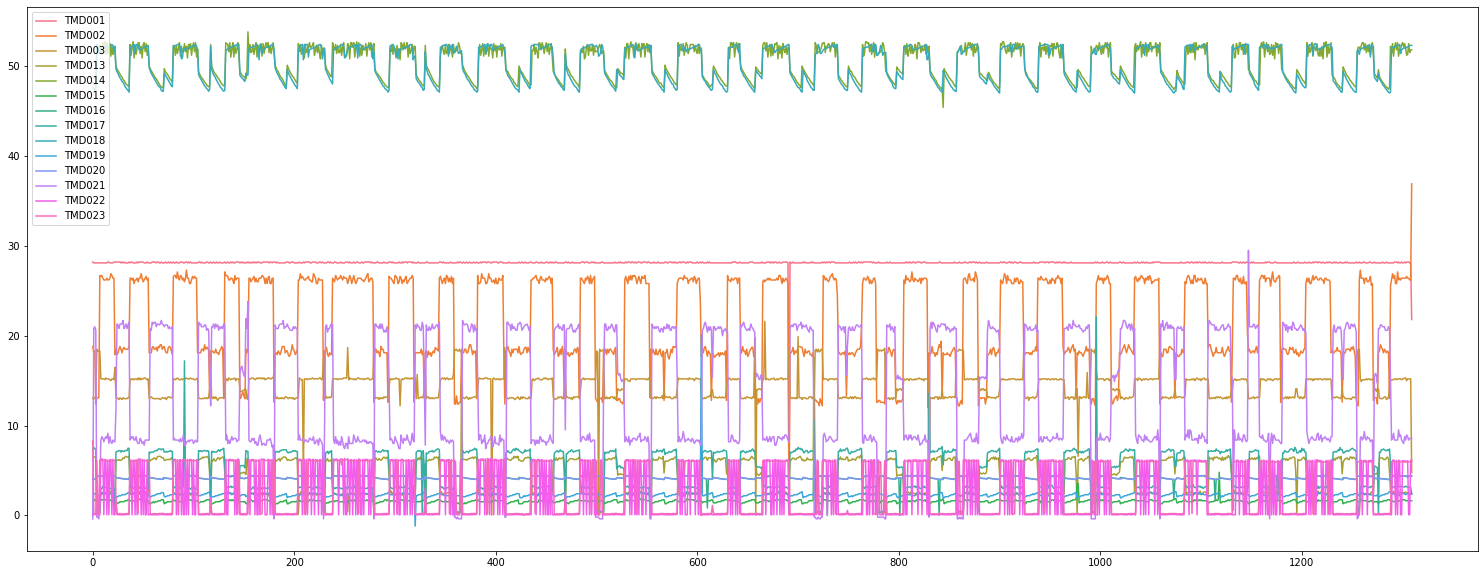

In [5]:
import seaborn as sns
plt.figure(figsize=(26, 10))
sns.lineplot(data=df, dashes=False)

### Nota:
Nesse primeiro momento é possivel identificar o comportamento ciclico das telemetrias, relacionado aos momentos de eclipse e visada do sol. Também é possivel identificar alguns picos em alguns sinais mas que, devido a janela de tempo muito extensa, torna-se dificil a vizualização. Afim de contornar este problema, será feito um plot com janela temporal menor. 

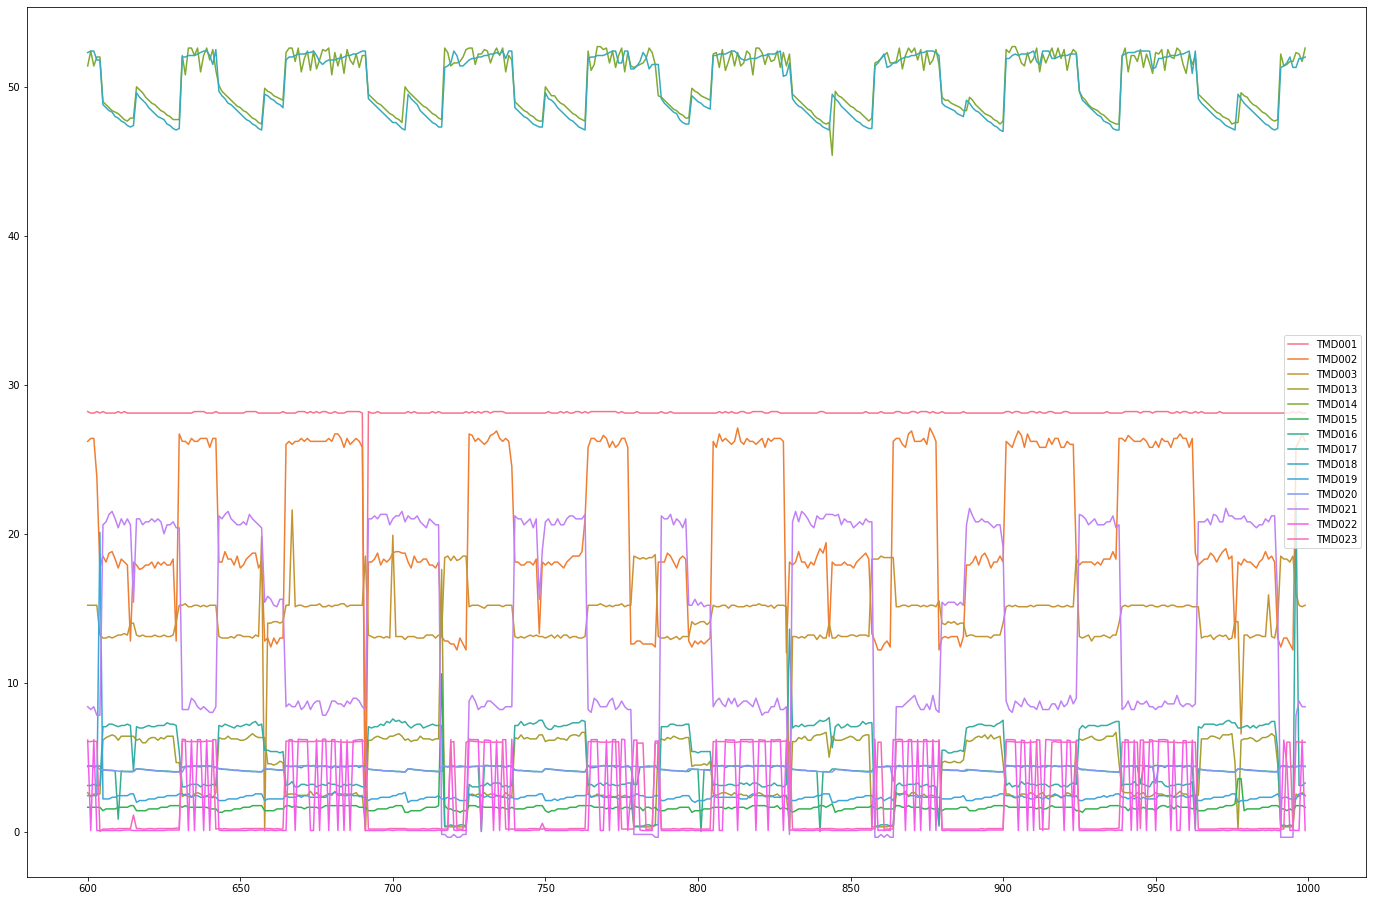

In [6]:
plt.figure(figsize=(24, 16))
sns.lineplot(data=df[600:1000], dashes=False)

### Nota:
Ainda com uma janela de tempo reduzida, devido a sobreposição dos sinais, fica dificil a analise do comportamento. Num primeiro momento, é possivel infeir que as telemetrias TMD0014 e TMD0018, relativas as tesões da bateria estão se comportando de maneira esperada. O que pode ser confimado com o grafico tipo o boxsplot demonstrado na figura abaixo.(**Adicionar o numero da figura**)

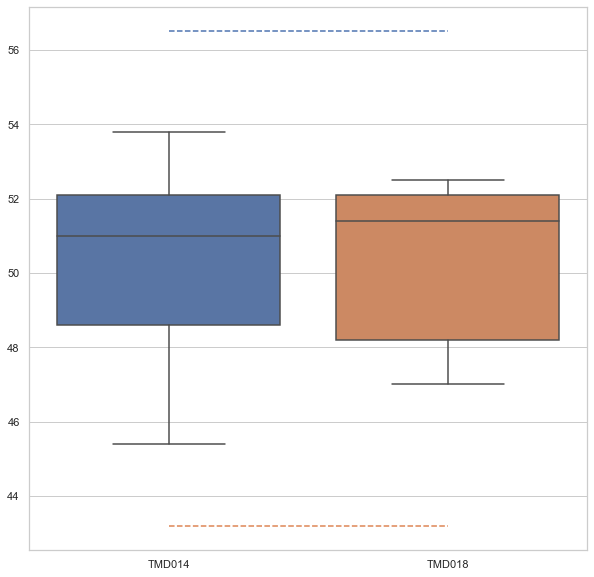

In [7]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
sns.boxplot(data=df, order = ['TMD014','TMD018'])
plt.plot([0, 1], [56.5, 56.5],  ls='--')
plt.plot([0, 1], [43.2, 43.2],  ls='--')


### Nota:
No grafico acima, a linha azul tracejada indica o valor maximo permitido para tensão das baterias, e de maneira analoga, a linha laranja tracejada, o valor minimo permitido. Embora o valor de tensão destas tenha sido levemente diferente durante a janela de tempo analizada, é posivel afiram que estas podem ser excluidas de analise posteriores. Além disso é possivel perceber que os valores apresentados pelas baterias durante o periodo avaliado tiveram um distribuição muito parecida.

Abaixo foi feito o plot dos sinais de maneira separada afim de evitar a sobreposição destes. Os sinais foram oganização confome listados na tabela 1.

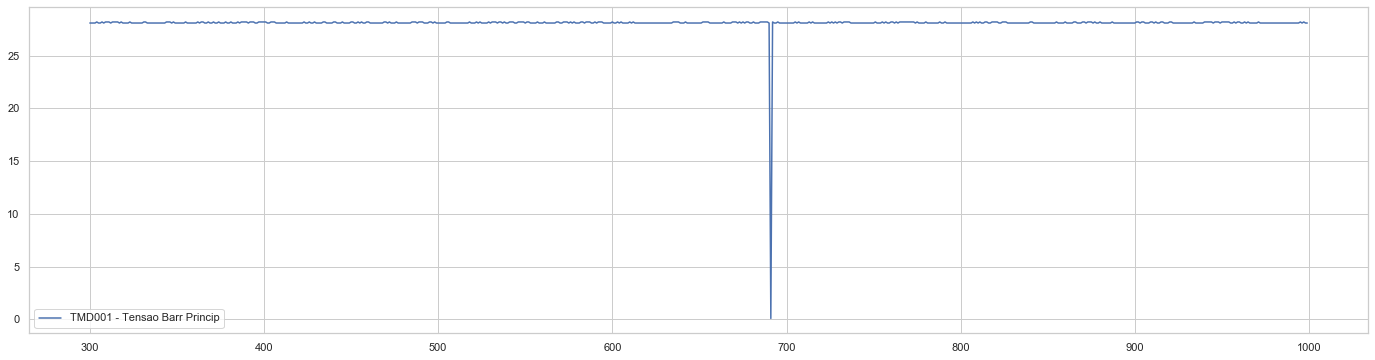

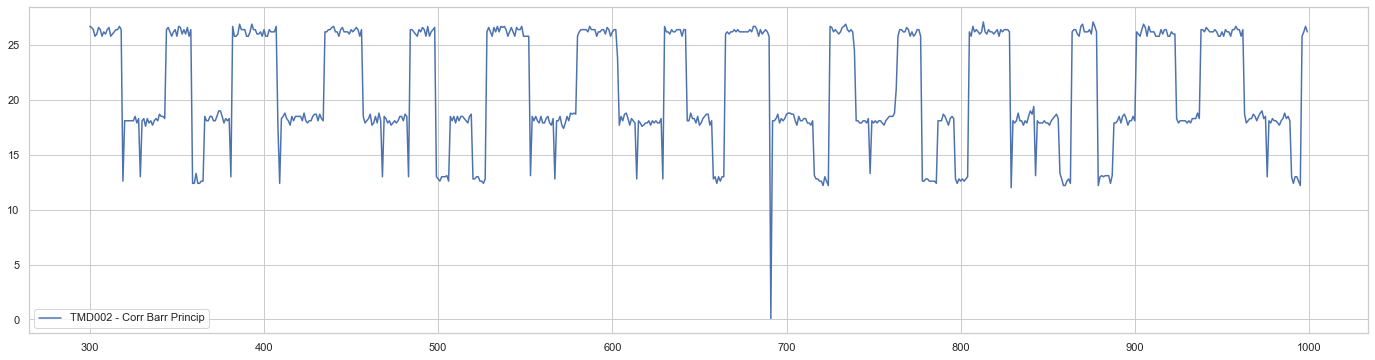

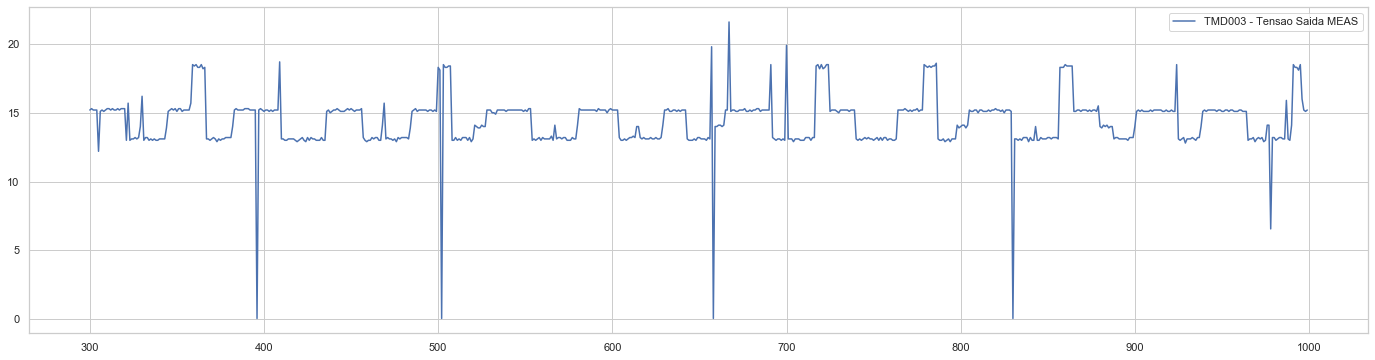

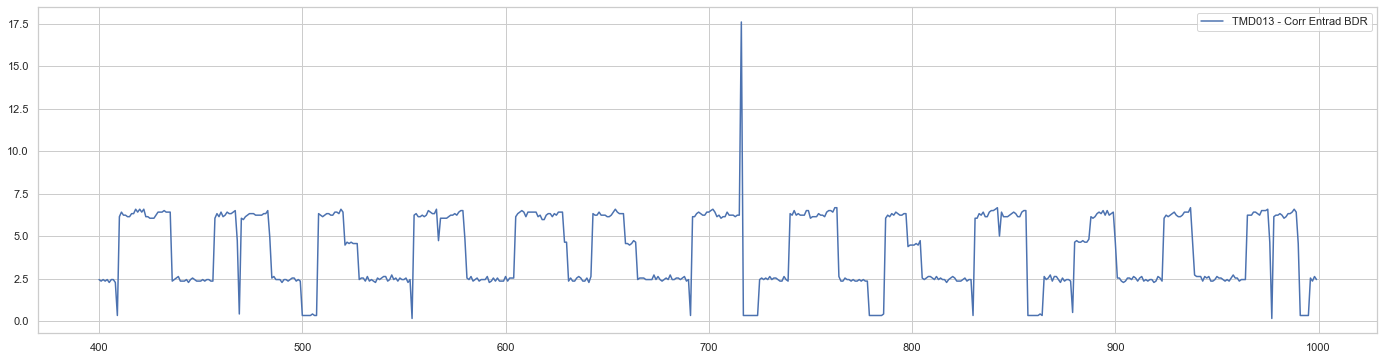

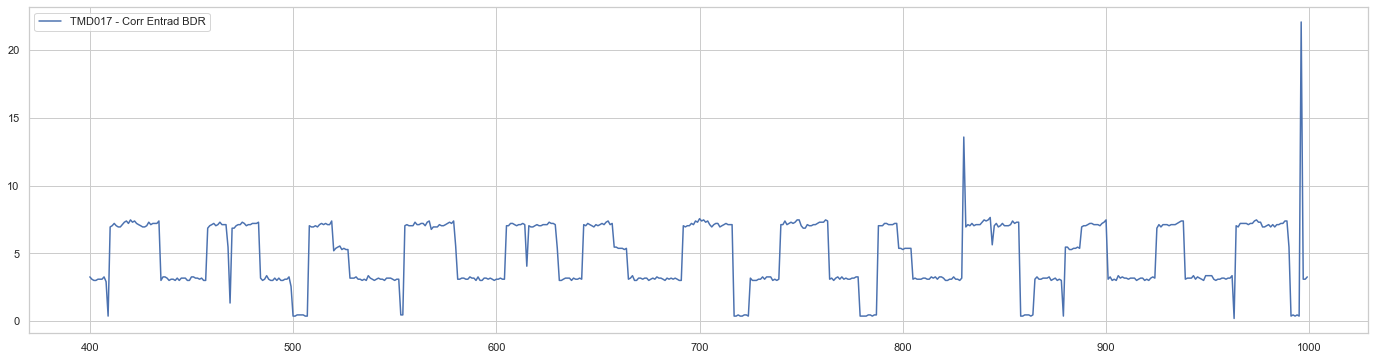

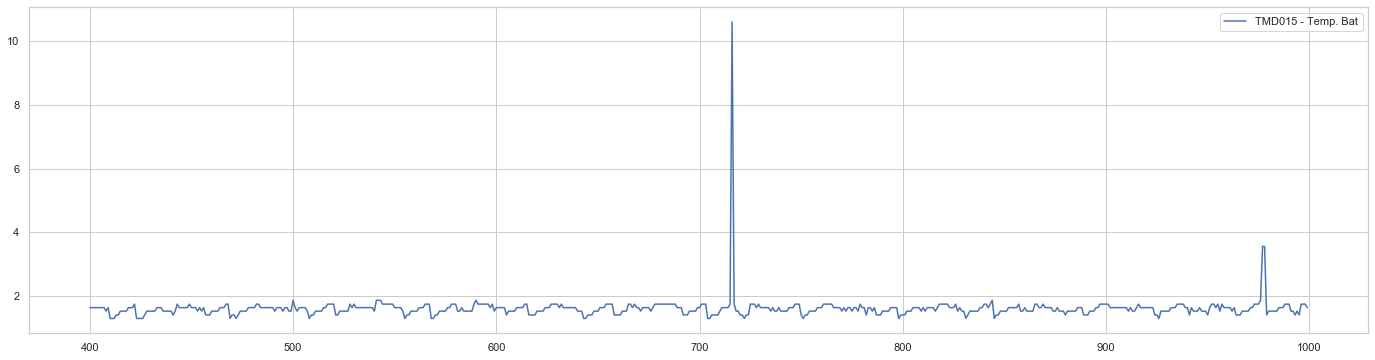

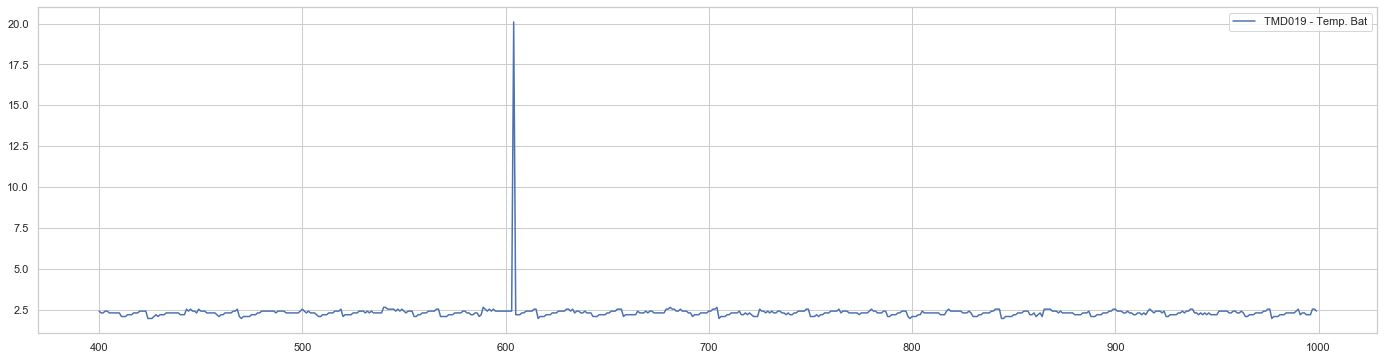

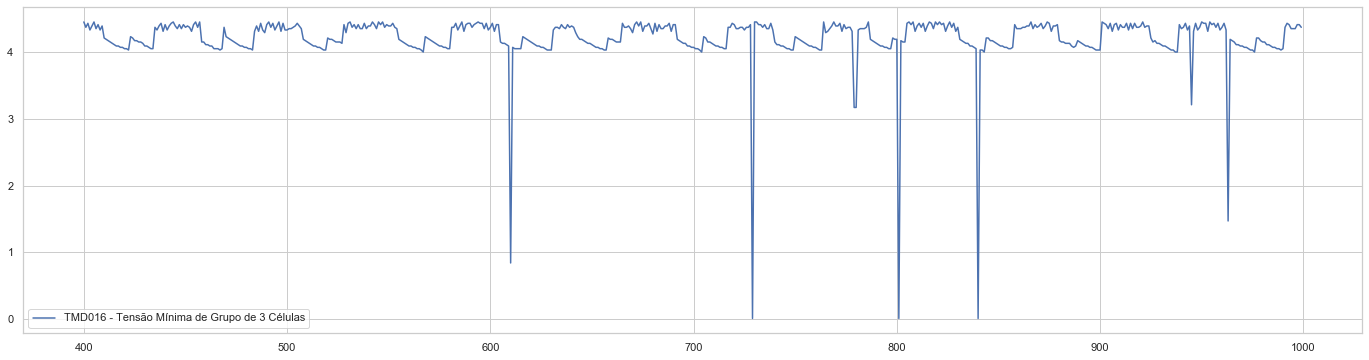

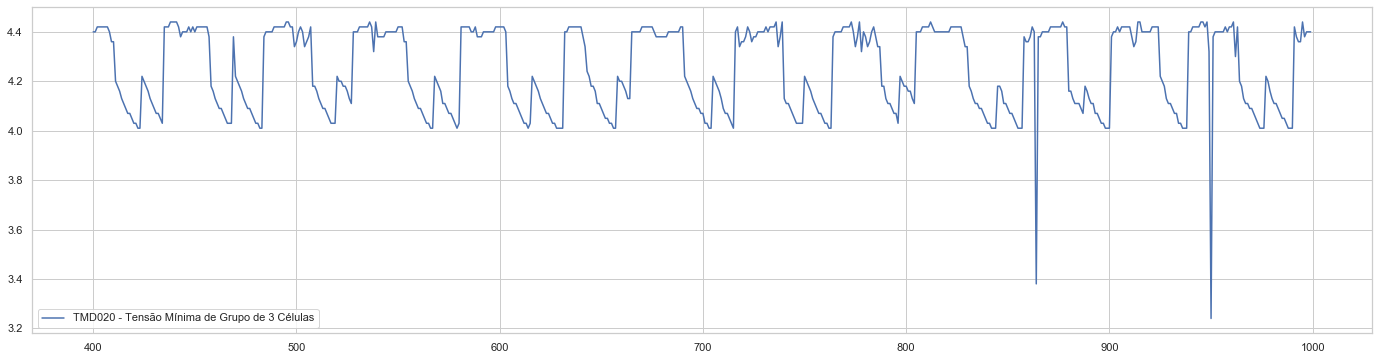

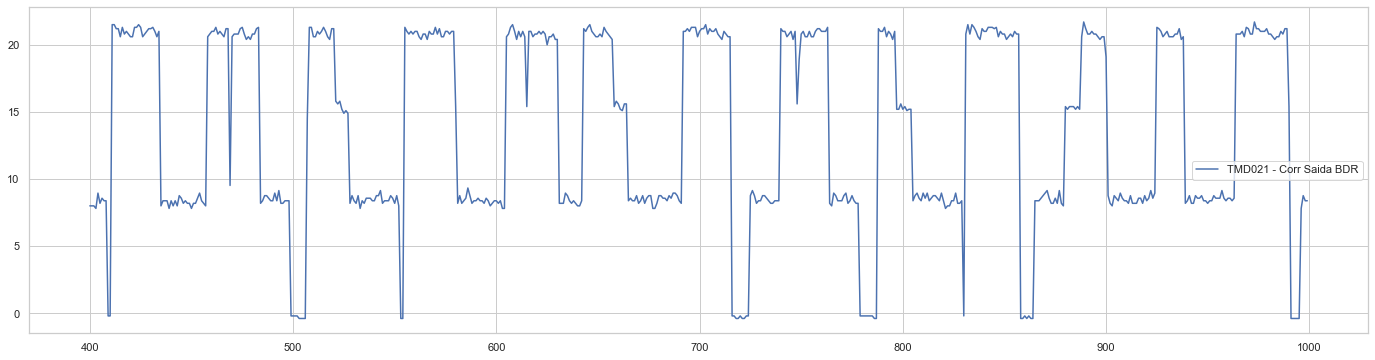

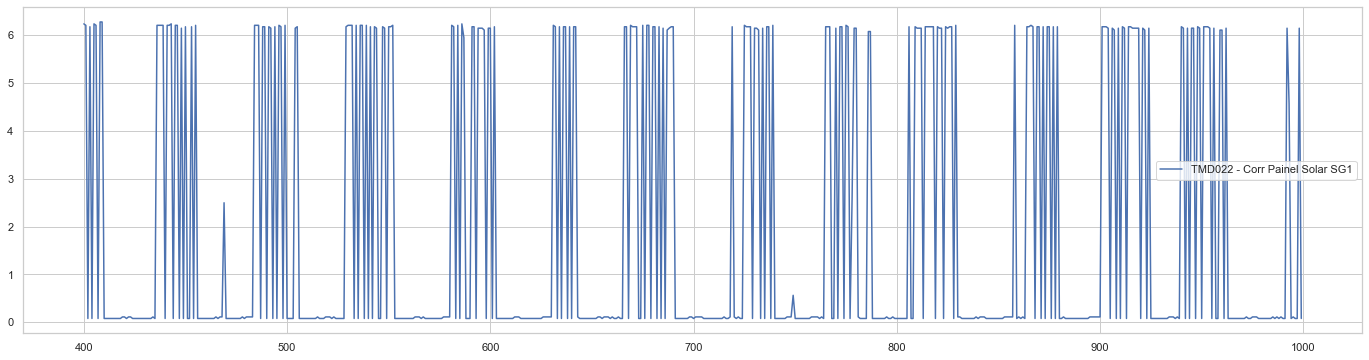

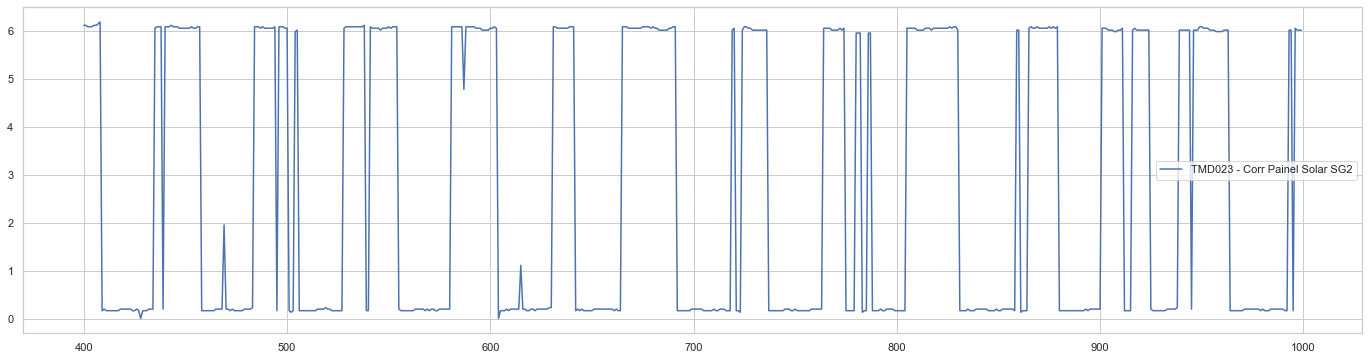

In [8]:
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 300:1000:1]["TMD001"], dashes=False, label = "TMD001 - Tensao Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 300:1000:1]["TMD002"], dashes=False, label = "TMD002 - Corr Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 300:1000:1]["TMD003"], dashes=False, label = "TMD003 - Tensao Saida MEAS")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD013"], dashes=False, label = "TMD013 - Corr Entrad BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD017"], dashes=False, label = "TMD017 - Corr Entrad BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD015"], dashes=False, label = "TMD015 - Temp. Bat")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD019"], dashes=False, label = "TMD019 - Temp. Bat")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD016"], dashes=False, label = "TMD016 - Tensão Mínima de Grupo de 3 Células")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD020"], dashes=False, label = "TMD020 - Tensão Mínima de Grupo de 3 Células")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD021"], dashes=False, label = "TMD021 - Corr Saida BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD022"], dashes=False, label = "TMD022 - Corr Painel Solar SG1")
plt.figure(figsize=(24, 6))
sns.lineplot(data=df[ 400:1000:1]["TMD023"], dashes=False, label = "TMD023 - Corr Painel Solar SG2")

### Nota:
O grafico boxplot abaixo contendo todos os dados de telemetria com excessão dos sinais TMD014 e TMD018, buscar desmonstrar a distribuição e os outliers dos dados de telemetria referentes a janela de tempo do mes de janeiro de 2000. É possivel observar uma maior quantidades de outliers nos sinais TMD015 e TMD016 referentes a temperatura das baterias e a tensão mínima de grupo de 3 células respectivamente

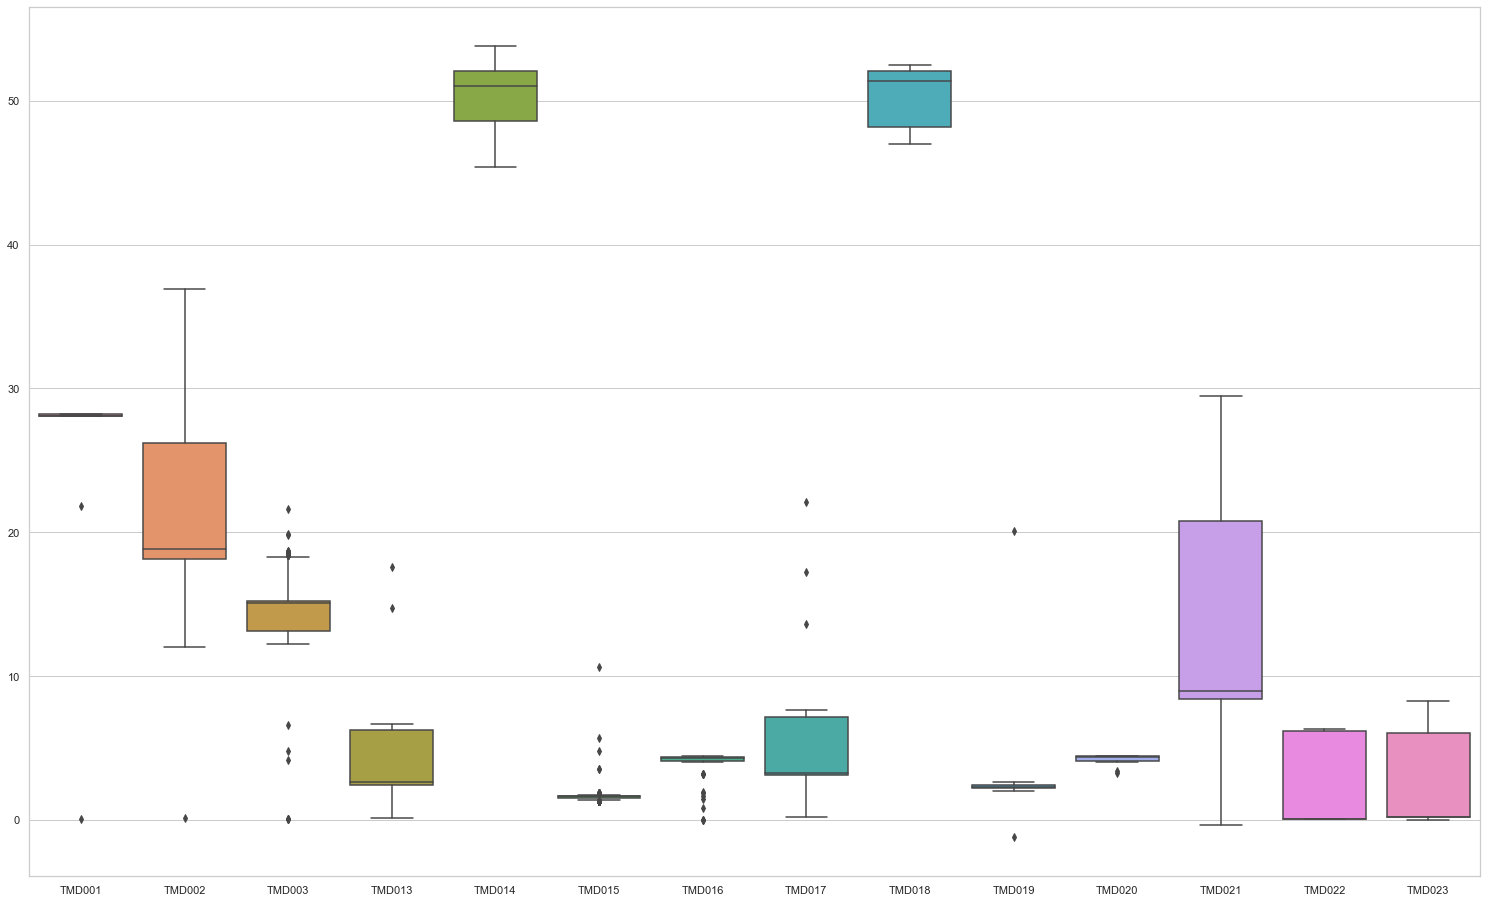

In [17]:
# Boxplot
plt.figure(figsize=(26, 16))
sns.boxplot(data=df)

### Nota:
Embora a representação possa evidenciar algus outliers, assim como a dispersão e simetria dos dados, as informações obtidas a partir dessa analise são encipientes e inviabilizam a inferência sobre algo mais concreto. Até mesmo porque como os dados de telemetria em sua grande maioria representam valores não diretamente correlacionados, torna-se dificil avalia-los atraves deste boxplot. 
Para um melhor analisa, serão carregados os dados relativos as janelas de tempo de :

**Março de 2000(1 a 16);

**Janeiro de 2003;

**Março de 2003(1 a 16);

**Junho de 2003.

Esses novos dados serão utilizados de duas maneiras diferentes. A primeira será agrunpando-os afim de formar um série temporal que viabilizara a visualização da evolução dos dados ao longo do tempo. E um segunda abordagem que fará uma comparação entre algumas telemetrias com o uso da ferramenta boxsplot.

In [51]:
dfJa00 = df
dfMa00 = pd.read_csv('rawData/CBERS1/01mar2000_a_16mar2000_vi.csv')
dfJa03 = pd.read_csv('rawData/CBERS1/01jan2003_a_31jan2003_vi.csv')
dfMa03 = pd.read_csv('rawData/CBERS1/01mar2003_a_16mar2003_vi.csv')
dfJn03 = pd.read_csv('rawData/CBERS1/01jun2003_a_30jun2003_vi.csv')

In [52]:
dfJa00.columns = ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]
dfMa00 = dfMa00[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
dfMa00 = dfMa00.drop(columns=['OBTIME'])
dfMa00.columns =  ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]
dfJa03 = dfJa03[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
dfJa03 = dfJa03.drop(columns=['OBTIME'])
dfJa03.columns = ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]
dfMa03 = dfMa03[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
dfMa03 = dfMa03.drop(columns=['OBTIME'])
dfMa03.columns = ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]
dfJn03 = dfJn03[ ["OBTIME", "TMD001", "TMD002", "TMD003", "TMD013", "TMD014", "TMD015", "TMD016", "TMD017", "TMD018", "TMD019", "TMD020", "TMD021", "TMD022", "TMD023"] ]
dfJn03 = dfJn03.drop(columns=['OBTIME'])
dfJn03.columns = ["TMD001 - Tensao Barr Princip", "TMD002 - Corr Barr Princip", "TMD003 - Tensao Saida MEAS", "TMD013 - Corr Entrad BDR", "TMD014 - Tensão das baterias", "TMD015 - Temp. Bat", "TMD016 - Tensão Mínima de Grupo de 3 Células", "TMD017 - Corr Entrad BDR", "TMD018 - Tensão das baterias", "TMD019 - Temp. Bat", "TMD020 - Tensão Mínima de Grupo de 3 Células", "TMD021 - Corr Saida BDR", "TMD022 - Corr Painel Solar SG1", "TMD023 - Corr Painel Solar SG2"]

### Nota:
Primeiramente, vamos tentar analizar a evolção dos dados de telemetria olhando para toda a janela temporal de aquisiçoes. Pois,  ainda que as aquiscições não tenham sido continuas, atraves delas poderemos verificar a existencia de alguma tendecia nos sinais.

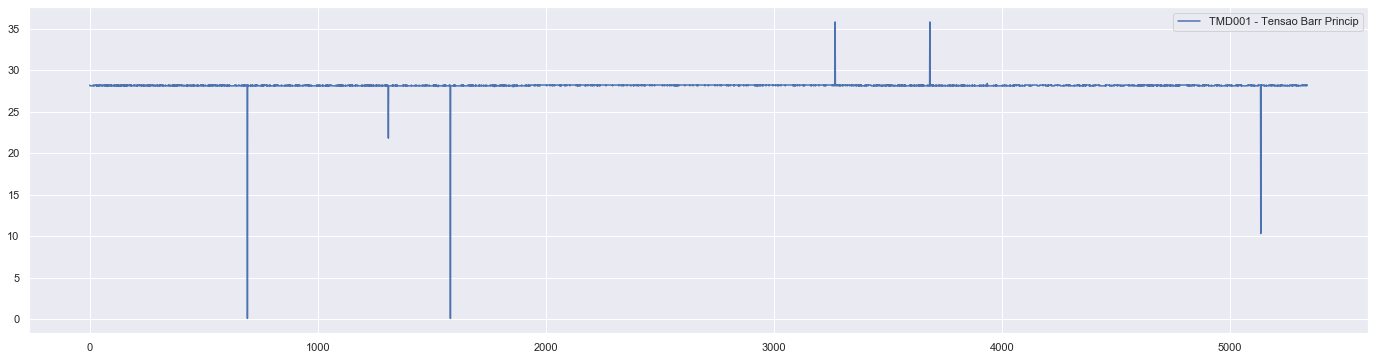

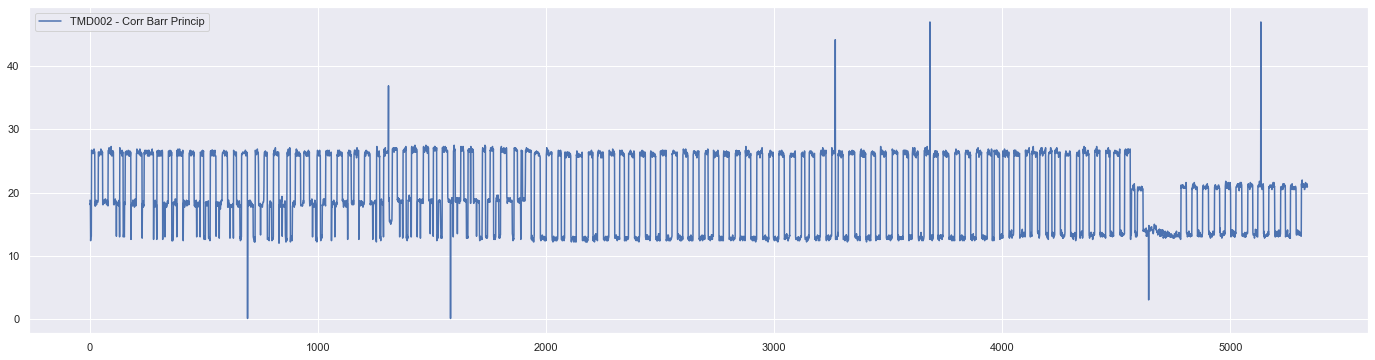

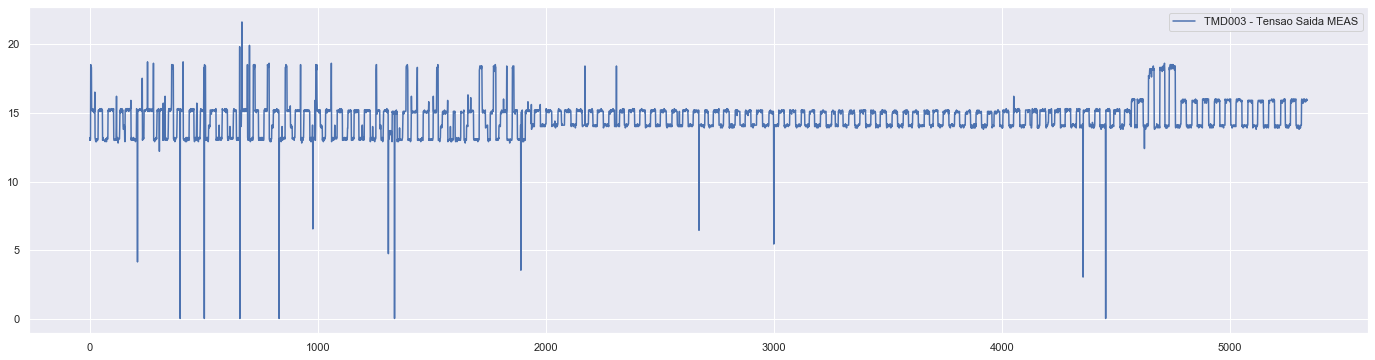

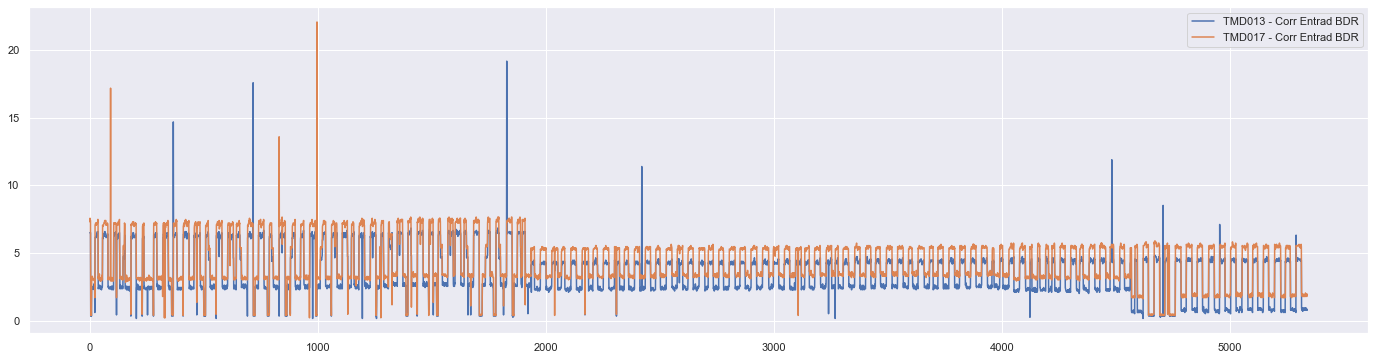

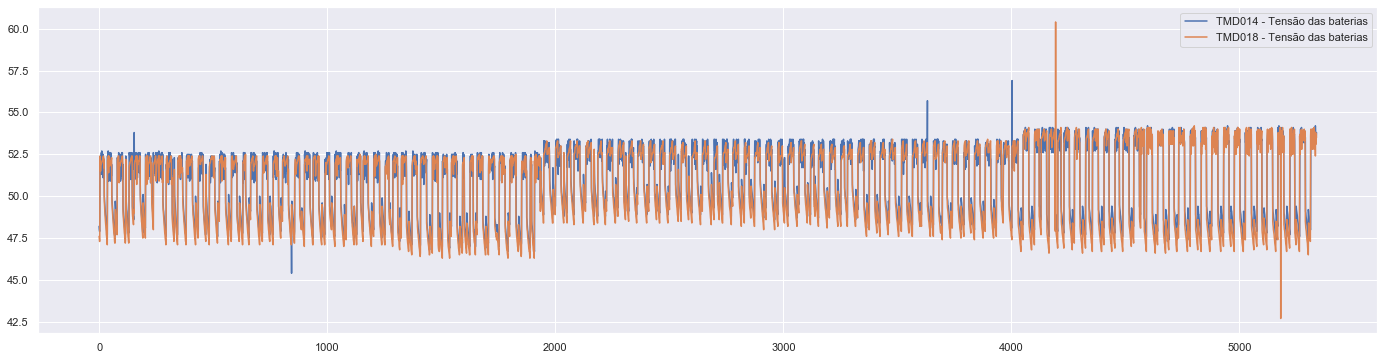

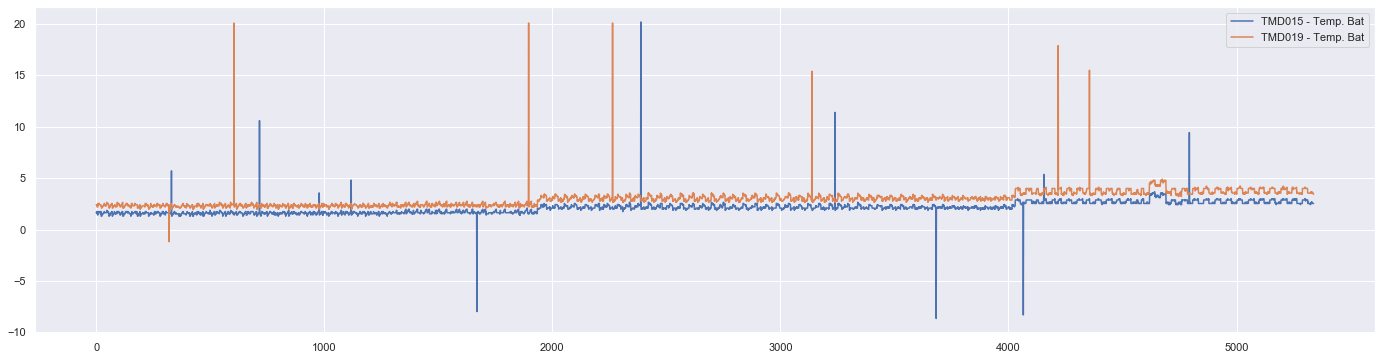

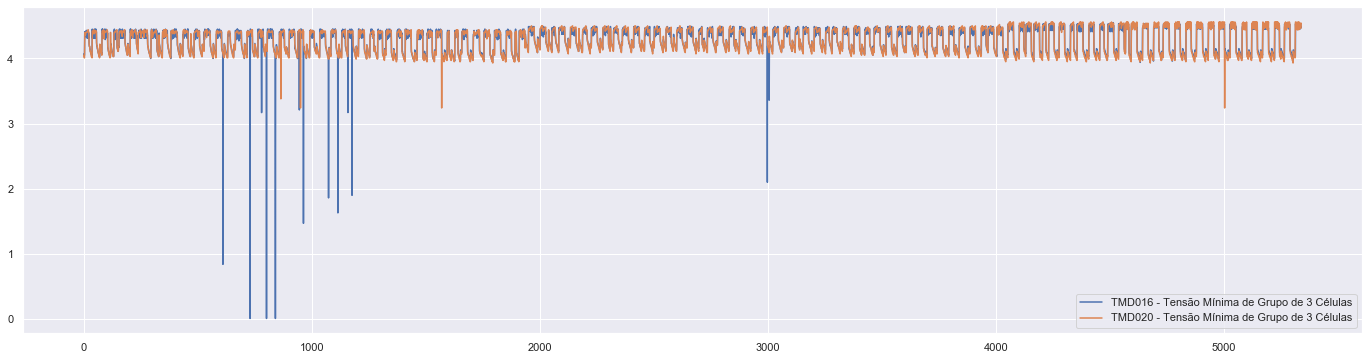

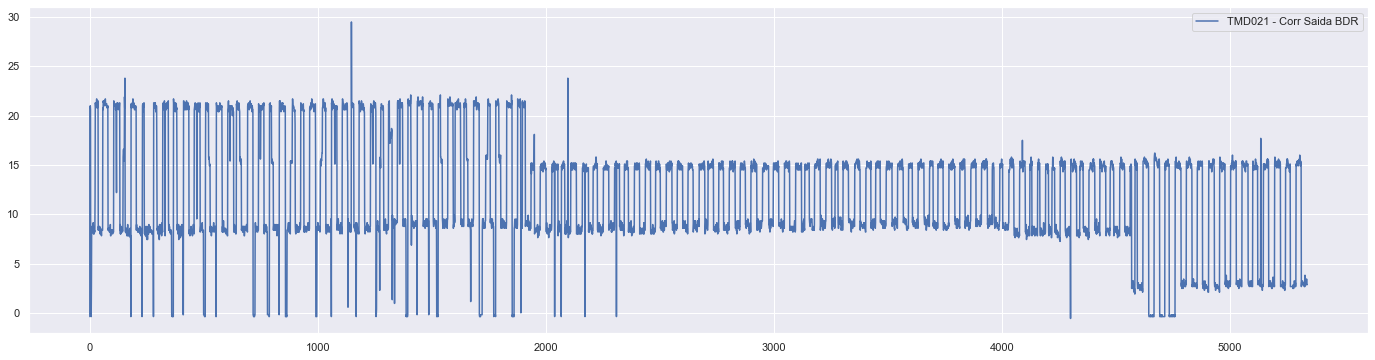

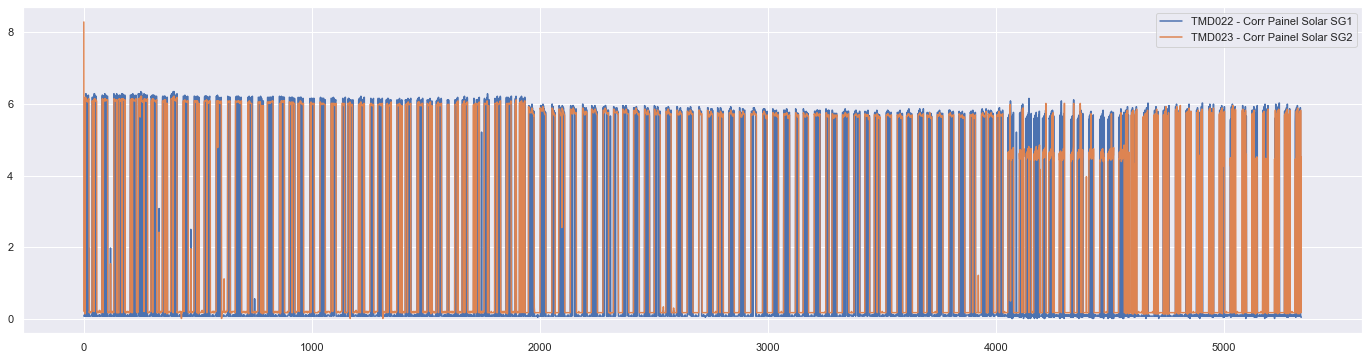

In [60]:
BigPicture = [dfJa00, dfMa00, dfJa03, dfMa03, dfJn03]
BigPicture = pd.concat(BigPicture)
BigPicture = BigPicture.reset_index()
BigPicture = BigPicture.drop(columns=['index'])
BigPicture
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture["TMD001 - Tensao Barr Princip"], dashes=False, label = "TMD001 - Tensao Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture["TMD002 - Corr Barr Princip"], dashes=False, label = "TMD002 - Corr Barr Princip")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture["TMD003 - Tensao Saida MEAS"], dashes=False, label = "TMD003 - Tensao Saida MEAS")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD013 - Corr Entrad BDR","TMD017 - Corr Entrad BDR"]], dashes=False)
##plt.figure(figsize=(24, 6))
##sns.lineplot(data=df[ 400:1000:1]["TMD017"], dashes=False, label = "TMD017 - Corr Entrad BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD014 - Tensão das baterias","TMD018 - Tensão das baterias"]], dashes=False)
##plt.figure(figsize=(24, 6))
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD015 - Temp. Bat","TMD019 - Temp. Bat"]], dashes=False)
##plt.figure(figsize=(24, 6))
##sns.lineplot(data=df[ 400:1000:1]["TMD019"], dashes=False, label = "TMD019 - Temp. Bat")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD016 - Tensão Mínima de Grupo de 3 Células","TMD020 - Tensão Mínima de Grupo de 3 Células"]], dashes=False)
##plt.figure(figsize=(24, 6))
##sns.lineplot(data=df[ 400:1000:1]["TMD020"], dashes=False, label = "TMD020 - Tensão Mínima de Grupo de 3 Células")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture["TMD021 - Corr Saida BDR"], dashes=False, label = "TMD021 - Corr Saida BDR")
plt.figure(figsize=(24, 6))
sns.lineplot(data=BigPicture[["TMD022 - Corr Painel Solar SG1","TMD023 - Corr Painel Solar SG2"]], dashes=False)
##plt.figure(figsize=(24, 6))
##sns.lineplot(data=df[ 400:1000:1]["TMD023"], dashes=False, label = "TMD023 - Corr Painel Solar SG2")

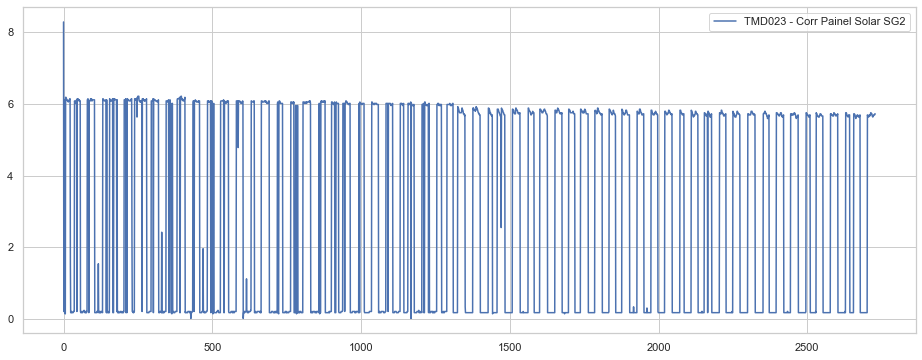

In [40]:
TM023_00 = pd.DataFrame(rawData["TMD023"])
TM023_03 = pd.DataFrame(rawData2["TMD023"])
frames =[TM023_00 , TM023_03]
result = pd.concat(frames)
result = result.reset_index()
result = result.drop(columns=['index'])
result
plt.figure(figsize=(16, 6))
sns.lineplot(data=result["TMD023"], dashes=False, label = "TMD023 - Corr Painel Solar SG2")

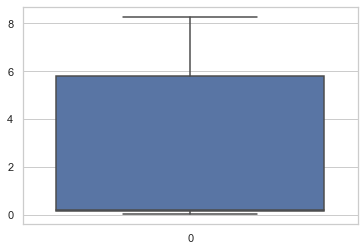

In [15]:
sns.boxplot(data=result['TMD023'])

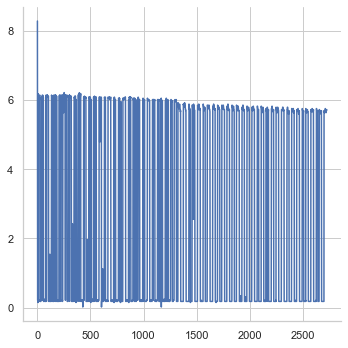

In [16]:
sns.relplot( hue="region", style="event",
            dashes=False, markers=True, kind="line", data=result['TMD023']);

In [49]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.relplot(x="timepoint", y="signal", kind="line", data=BigPicture);

ValueError: Could not interpret input 'timepoint'